In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
z = spam['v2']
y = spam["v1"]
z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)

In [4]:
cv = CountVectorizer()
features = cv.fit_transform(z_train)

In [5]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

In [7]:
features_test = cv.transform(z_test)
print("Accuracy: {:.2f}%".format(model.score(features_test,y_test)*100))

Accuracy: 97.67%


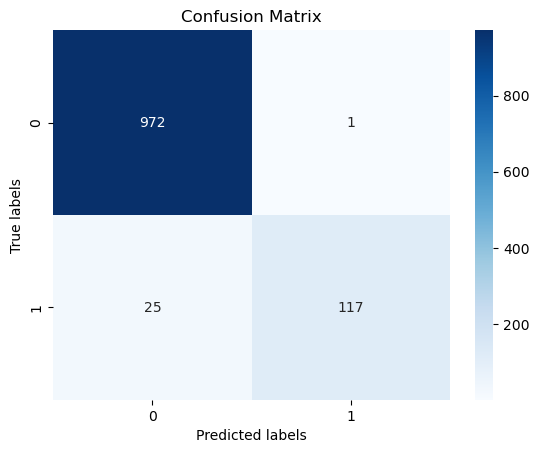

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(features_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["ham", "spam"])

# Plot heatmap of confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()
